<a href="https://colab.research.google.com/github/RogerHeederer/DL_Entry_Pytorch/blob/master/SoftmaxRegression_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ref : wikidocs Pytorch로 시작하는 딥러닝 입문

torchvision : 유명한 데이터셋, 이미 구현된 유명한 모델. 이미지 전처리 도구들을 포함하고 있는 패키지

torchtext : 자연어 처리를 위한 패키지

In [2]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random

In [3]:
USE_CUDA = torch.cuda.is_available()
device = torch.device("cuda" if USE_CUDA else "cpu")
print("다음 기기로 학습을 시작합니다:", device)

다음 기기로 학습을 시작합니다: cuda


In [5]:
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
  torch.cuda.manual_seed_all(777)

In [6]:
#hyperparameters
training_epochs = 15
batch_size = 100

In [7]:
#MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/', #데이터 받을 경로
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw


Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw


Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [8]:
#dataset loader
data_loader = DataLoader(dataset=mnist_train,
                         batch_size = batch_size,
                         shuffle=True, #매 epoch마다 미니 배치를 셔플할 것인지 여부
                         drop_last=True) #마지막 배치를 버릴 것인지

예) 데이터 1000개. 배치 크기 128

128 * 7 = 896

데이터 104개 남음. 다른 미니 배치보다 개수가 적은 마지막 배치를 경사하강법에 사용하면, 마지막 배치가 상대적으로 과대 평가 되는 현상이 있음. 그래서 drop_last=True 설정을 통해 마지막 배치를 버려줌으로써, 위 현상을 박을 수 있음

to() 함수는 연산을 어디서 수행할지 정함. 이 함수는 모델의 매개변수를 지정한 장치의 메모리로 보낸다. 우리는 GPU를 사용하니까 to('cuda')를 해줘야 함. 아무것도 지정 안하면, CPU연산이 됨

In [15]:
len(data_loader)

600

In [9]:
linear = nn.Linear(784, 10, bias=True).to(device)

In [13]:
linear

Linear(in_features=784, out_features=10, bias=True)

In [10]:
#비용 함수와 옵티마이저 정의
criterion = nn.CrossEntropyLoss().to(device) #크로스 엔트로피는 내부적으로 softmax 함수 포함한다.
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

In [16]:
for epoch in range(training_epochs):
  avg_cost = 0
  total_batch = len(data_loader)

  for X, Y in data_loader:
    X = X.view(-1, 28 * 28).to(device) #배치 크기가 100이라 X는 (100, 784) 텐서가 됨
    Y = Y.to(device) # 0~9로 정수 인코딩 된 상태 (원핫인코딩 아님)

    optimizer.zero_grad()
    hypothesis = linear(X)
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    avg_cost += cost / total_batch

  print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 0.535468459
Epoch: 0002 cost = 0.359274149
Epoch: 0003 cost = 0.331187516
Epoch: 0004 cost = 0.316578031
Epoch: 0005 cost = 0.307158172
Epoch: 0006 cost = 0.300180733
Epoch: 0007 cost = 0.295130193
Epoch: 0008 cost = 0.290851504
Epoch: 0009 cost = 0.287417084
Epoch: 0010 cost = 0.284379572
Epoch: 0011 cost = 0.281825215
Epoch: 0012 cost = 0.279800713
Epoch: 0013 cost = 0.277809024
Epoch: 0014 cost = 0.276154310
Epoch: 0015 cost = 0.274440855
Learning finished


In [20]:
mnist_test.test_data.view(-1, 28*28)

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:60: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")


tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]], dtype=torch.uint8)

In [21]:
mnist_test.test_labels

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:50: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


tensor([7, 2, 1,  ..., 4, 5, 6])

In [22]:
linear

Linear(in_features=784, out_features=10, bias=True)

Accuracy: 0.8862999677658081
Label:  7
Prediction:  7


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:60: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:50: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


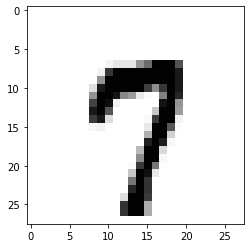

In [25]:
#학습 완료된 모델을 가지고 테스트 해보자
with torch.no_grad(): #torch.no_grad()는 gradient 계산을 수행하지 않는다.
  X_test = mnist_test.test_data.view(-1, 28*28).float().to(device)
  Y_test = mnist_test.test_labels.to(device)

  prediction = linear(X_test)
  correct_prediction = torch.argmax(prediction, 1) == Y_test
  accuracy = correct_prediction.float().mean()
  print('Accuracy:', accuracy.item())

  r = random.randint(0, len(mnist_test) - 1) # mnist 테스트 데이터에서 무작위 하나 추출
  X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
  Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

  print('Label: ', Y_single_data.item())
  single_prediction = linear(X_single_data)
  print('Prediction: ', torch.argmax(single_prediction, 1).item())

  plt.imshow(mnist_test.test_data[r:r+1].view(28,28), cmap='Greys', interpolation='nearest')
  plt.show()